# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
# Can skip executing parts of this notebook
do_step1 = False
do_step2 = False

In [2]:
import numpy as np
from glob import glob

rootdir = '/data'

# load filenames for human and dog images
#human_files = np.array(glob("/data/lfw/*/*"))
#dog_files = np.array(glob("/data/dog_images/*/*/*"))
human_files = np.array(glob(rootdir+"/lfw/*/*"))
dog_files = np.array(glob(rootdir + "/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [3]:
print(human_files[0])
print(dog_files[0])

/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [4]:
!ls haarcascades

haarcascade_frontalface_alt.xml


Number of faces detected: 1


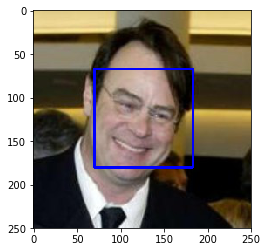

In [5]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# Note: cv2.CascadeClassifier fails when the xml file is downloaded with wget,
# but it works if do a copy/paste of the same file.
# Follow up: wget fetches an html version of file, not the xml file.
#
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
#face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')
#face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')


# From https://stackoverflow.com/questions/30508922/error-215-empty-in-function-detectmultiscale
# cv2 apparently can resolve this or is built in, so no download is needed
# This works on my laptop, but not in udacity
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [6]:
faces

array([[ 70,  67, 113, 113]], dtype=int32)

In [7]:
print(len(human_files))
print(type(human_files))

13233
<class 'numpy.ndarray'>


Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [9]:
from tqdm import tqdm

npics = 2
human_files_short = human_files[:npics]
dog_files_short = dog_files[:npics]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

if do_step1:
    num_humans_det = 0
    for human_file in human_files_short:
        if face_detector(human_file) > 0:
            num_humans_det += 1
    percent = 100 * float(num_humans_det) / npics
    print("detected %d human faces out of %d human photos: %0.2f%% correct" % (num_humans_det, npics, percent))

    num_humans_det = 0
    for dog_file in dog_files_short:
        if face_detector(dog_file) > 0:
            num_humans_det += 1
    percent = 100 * float(num_humans_det) / npics
    print("detected %d human faces out of %d dog photos: %0.2f%% incorrect" % (num_humans_det, npics, percent))

In [10]:
# # This has an error.  Something in cv2.cvtColor() is not compatible with tqdm
# # Run this with a status bar from tqdm
# import sys
# from tqdm import tqdm

# npics_short = 100
# dog_files_short = dog_files[:npics_short]

# with tqdm(total=100, file=sys.stdout) as pbar:
#     num_human_faces_det = 0
#     for dog_files in dog_files_short:
#         if face_detector(dog_files) > 0:
#             num_human_faces_det += 1
#         pbar.update(10)

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# Simplest way is to change face_cascade to another algorithm in cell under Step 1

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [12]:
import torch

In [13]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [14]:
# Try different models by changing VGG16 line

import torch
import torchvision.models as models

# define VGG16 model

VGG16 = None
if do_step2:
    VGG16 = models.vgg16(pretrained=True)  # 100% correct
    #VGG16 = models.vgg11(pretrained=True)  # 99% correct
    #VGG16 = models.alexnet(pretrained=True) # 99% correct

    #VGG16 = models.densenet161(pretrained=True)  # 0% correct
    #VGG16 = models.densenet201(pretrained=True)  # 0% correct
    #VGG16 = models.resnet18(pretrained=True) # 0% correct
    #VGG16 = models.resnet34(pretrained=True) # 0% correct
    #VGG16 = models.resnet50(pretrained=True) # 0% correct
    #VGG16 = models.resnet152(pretrained=True) # 0% correct

    #VGG16 = models.inception_v3(pretrained=True) # % error in VGG16_predict, input size is different
    #VGG16 = models.googlenet(pretrained=True) # no such model



    # move model to GPU if CUDA is available
    if use_cuda:
        VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [15]:
from PIL import Image

In [16]:
dog = Image.open(rootdir + '/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')

In [17]:
dog.size

(400, 300)

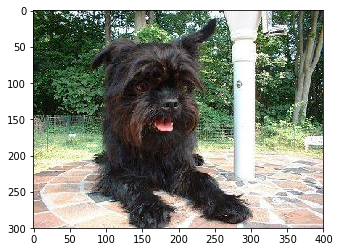

In [18]:
plt.imshow(dog)
plt.show()

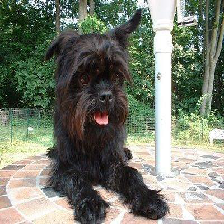

In [19]:
dog.resize((224, 224))

In [20]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # load image - note vgg16 expects 224x224 images
    input_image = Image.open(img_path)

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        VGG16.to('cuda')

    with torch.no_grad():
        output = VGG16(input_batch)
    
    #print(output[0])
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    #print(torch.nn.functional.softmax(output[0], dim=0))
    _, pred = torch.max(output, 1)
    #print(pred)

    
    return pred # predicted class index

In [21]:
if do_step2:
    VGG16_predict(rootdir + '/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [22]:
# Read in image labels as a dictionary, but could have put in a list
# img_class_dict = {}
# with open("imagenet1000_clsidx_to_labels.txt") as f:
#     for line in f:
#         (key, val) = line[:-2].split(':')
#         img_class_dict[int(key)] = val.strip().strip('\'')
# img_class_dict[0]

In [23]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    retv = False
    pred = VGG16_predict(img_path)
    if (pred > 150 and pred <269):
        retv = True
    
    return retv # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [24]:
import sys

def dog_detector_list(pathlist):
    npics = len(pathlist)
    nupdate = int(npics / 10)
    num_dogs_det = 0
    with tqdm(total=npics, file=sys.stdout) as pbar:
        for pic in pathlist:
            if dog_detector(pic):
                num_dogs_det += 1
            pbar.update(1)
    percent = 100 * float(num_dogs_det) / npics
    print("detected %d dogs out of %d photos: %0.2f%%" % (num_dogs_det, npics, percent))

In [25]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# human photos
npics_short = 2

if do_step2:
    human_files_short = human_files[:npics_short]
    dog_detector_list(human_files_short)

In [26]:
# dog photos
if do_step2:
    dog_files_short = dog_files[:npics_short]
    dog_detector_list(dog_files_short)

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [27]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# Simplest way is to change the model in the VGG16 line in cell below "Step 2: Detect Dogs"

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [28]:
import os
from torchvision import datasets

# how many samples per batch to load
batch_size = 10

imsize = 256

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.Resize([imsize, imsize]),
    #transforms.RandomHorizontalFlip(), # randomly flip and rotate
    #transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_data = datasets.ImageFolder(rootdir+'/dog_images/train', transform=transform)
test_data = datasets.ImageFolder(rootdir+'/dog_images/test', transform=transform)
valid_data = datasets.ImageFolder(rootdir+'/dog_images/valid', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [29]:
print(len(train_data.imgs))
train_data.imgs[5255]

6680


('/data/dog_images/train/098.Leonberger/Leonberger_06571.jpg', 97)

In [30]:
train_data.imgs[5254]

('/data/dog_images/train/098.Leonberger/Leonberger_06570.jpg', 97)

In [31]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# # Read Images.  Leonberger_6571 has error (index 5255 in train_data)
# #img = mpimg.imread('/data/dog_images/train/098.Leonberger/Leonberger_06571.jpg') 
# img = mpimg.imread('/data/dog_images/train/098.Leonberger/Leonberger_06570.jpg') 
  
# # Output Images 
# plt.imshow(img) 

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [33]:
# x, y = train_data[0]
# print(x.shape)
# imshow(x)

In [34]:
# Just for information
# Make a list of image sizes, something like: [[3, 300, 400], [3, 360, 480], [3, 316, 321]]
# Do this without the Resize line in transforms in above cell

import pandas as pd

# Need these 2 lines to avoid getting exception in bad image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Note: get an error at image 5255
def get_sizes(xdata, do_save=False):
    img_sizes = []
    for i in range(len(xdata)):
        try:
            x, y = xdata[i]
            #print("{}: {}".format(i, x.shape))
            img_sizes.append(list(x.shape))
        except Exception as exp:
            print("\nexception at index %i" % i)
            img_sizes.append([])
            
    # Put image sizesinto a data frame and save to pickle file
    df = pd.DataFrame(img_sizes, columns = ['depth', 'height', 'width'])
    if do_save:
        df.to_pickle('my_df.pickle')
    return df, img_sizes

In [35]:
if False:
    df, img_sizes = get_sizes(train_data)
    print(img_sizes[5255])
    print(df.describe)

In [36]:
# Read the original image sizes from pickle file
do_read_orig_sizes = False
if do_read_orig_sizes:
    df_orig = pd.read_pickle('my_df_orig.pickle')
    print(df_orig.describe())

In [37]:
num_classes = len(train_data.class_to_idx)

In [38]:
# Look at just a few entries of index to class name dictionary
print("Number of classes = %d " % num_classes)
d = train_data.class_to_idx
#lc = [(list(d.values())[i], list(d.items())[i]) for i in range(5, 10)]
lc = [list(d.items())[i] for i in range(0, 5)]
lc

Number of classes = 133 


[('001.Affenpinscher', 0),
 ('002.Afghan_hound', 1),
 ('003.Airedale_terrier', 2),
 ('004.Akita', 3),
 ('005.Alaskan_malamute', 4)]

In [39]:
train_data.class_to_idx

{'001.Affenpinscher': 0,
 '002.Afghan_hound': 1,
 '003.Airedale_terrier': 2,
 '004.Akita': 3,
 '005.Alaskan_malamute': 4,
 '006.American_eskimo_dog': 5,
 '007.American_foxhound': 6,
 '008.American_staffordshire_terrier': 7,
 '009.American_water_spaniel': 8,
 '010.Anatolian_shepherd_dog': 9,
 '011.Australian_cattle_dog': 10,
 '012.Australian_shepherd': 11,
 '013.Australian_terrier': 12,
 '014.Basenji': 13,
 '015.Basset_hound': 14,
 '016.Beagle': 15,
 '017.Bearded_collie': 16,
 '018.Beauceron': 17,
 '019.Bedlington_terrier': 18,
 '020.Belgian_malinois': 19,
 '021.Belgian_sheepdog': 20,
 '022.Belgian_tervuren': 21,
 '023.Bernese_mountain_dog': 22,
 '024.Bichon_frise': 23,
 '025.Black_and_tan_coonhound': 24,
 '026.Black_russian_terrier': 25,
 '027.Bloodhound': 26,
 '028.Bluetick_coonhound': 27,
 '029.Border_collie': 28,
 '030.Border_terrier': 29,
 '031.Borzoi': 30,
 '032.Boston_terrier': 31,
 '033.Bouvier_des_flandres': 32,
 '034.Boxer': 33,
 '035.Boykin_spaniel': 34,
 '036.Briard': 35,
 '

In [40]:
# Get 1 batch
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(len(images))

10


In [41]:
labels

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [42]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))
print(len(train_loader))

6680
835
836
668


In [43]:
# # error at 5255
# i = 5254
# x, y = train_data[i]
# print(y)
# print(x.shape)

### A few cells to look at some of the dog images from data_loader

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
def plotbatch(images_batch):
    '''Plot a batch of images, but only up to 10 images'''
    images = images_batch.numpy() # convert images to numpy for display

    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 4))
    # display 10 images per row
    for idx in np.arange(10):
        ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
        imshow(images[idx])

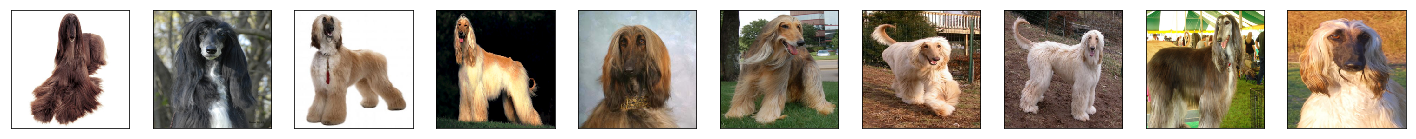

In [45]:
# set to the data you want to view (train_loader, valid_loader, test_loader)
dataiter = iter(train_loader)

# display a batch (set idx to the batch you want to see)
idx = 10
for i, (images, labels) in enumerate(dataiter):
    if i == idx:
        plotbatch(images)
        break

In [46]:
images[0].size()

torch.Size([3, 256, 256])

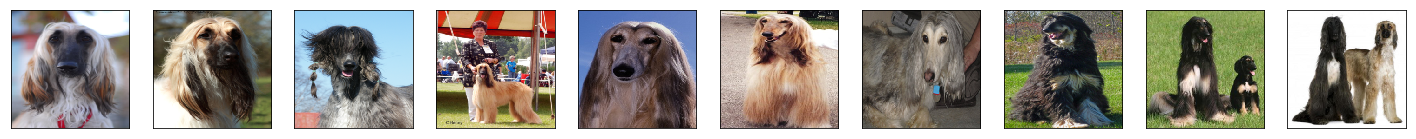

In [47]:
# You can keep executing this cell to cycle through the images
images, labels = dataiter.next()
plotbatch(images)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [48]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer, input is imsize x imsize x 3
        self.conv1 = nn.Conv2d(3, 16, 2, stride=2, padding=0) # output size imsize/2 x imsize/2 x 16
        #self.conv1 = nn.Conv2d(3, 16, 2, padding=1)
        
        # input is imsize/4 x imsize/4 x 16 after maxpool2
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # output size imsize/4 x imsize/4 x 32
        
        # input is imsize/8 x imsize/8 x 32 after maxpool2
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # output size imsize/8 x imsize/8 x 64
        
        # input is imsize/16 x imsize/16 x 64 after maxpool2
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # output size imsize/16 x imsize/16 x 128
        
        # max pooling layer
        self.pool2 = nn.MaxPool2d(2, 2) # downsample by 2
        
        
        # input to MLP is imsize/fac x imsize/fac x 128 x1 after a maxpool2 layer and flattening
        self.fac = 32
        self.num_nodes = int(imsize/self.fac * imsize/self.fac * 128)
        self.fc1 = nn.Linear(self.num_nodes, 256)
        self.fc2 = nn.Linear(256, num_classes)
        
        self.dropout = nn.Dropout(0.4)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool2(F.relu(self.conv1(x)))  # output is 64x64x32
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv2(x)))  # output is 32x32x64
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv3(x)))  # output is 16x16x128
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv4(x)))
        
        # flatten for MLP
        x = x.view(-1, self.num_nodes)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
       
        x = self.fc2(x)
        #x = nn.Softmax(dim=-1)(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=133, bias=True)
  (dropout): Dropout(p=0.4)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [49]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = None
criterion_scratch = nn.CrossEntropyLoss()


### TODO: select optimizer
optimizer_scratch = None
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

In [50]:
loaders_scratch = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

In [51]:
type(loaders_scratch['train'])

torch.utils.data.dataloader.DataLoader

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [52]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # debug
            if False and batch_idx == 200:
                print(output)
                print(len(output))
                print(len(output[0]))
                print(target)
                print(len(target))


            # calculate the batch loss
            loss = criterion(output, target)

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss
            #train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 50 == 0:
                print("%d" % batch_idx, end=' ')
            
        print("\nValidate model:")
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            if batch_idx % 50 == 0:
                print("%d" % batch_idx, end=' ')

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                  valid_loss_min, valid_loss))
            #torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [53]:
# train the model

from datetime import datetime
start_time=datetime.now()

#nepochs = 100
nepochs = 12
model_scratch = train(nepochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

print("run time: {} seconds".format(datetime.now()-start_time))

0 50 100 150 200 250 300 350 400 450 500 550 600 650 
Validate model:
0 50 Epoch: 1 	Training Loss: 4.234376 	Validation Loss: 4.937867
Validation loss decreased (inf --> 4.937867).  Saving model ...
0 50 100 150 200 250 300 350 400 450 500 550 600 650 
Validate model:
0 50 Epoch: 2 	Training Loss: 4.472797 	Validation Loss: 4.897881
Validation loss decreased (4.937867 --> 4.897881).  Saving model ...
0 50 100 150 200 250 300 350 400 450 500 550 600 650 
Validate model:
0 50 Epoch: 3 	Training Loss: 3.773930 	Validation Loss: 5.104670
0 50 100 150 200 250 300 350 400 450 500 550 600 650 
Validate model:
0 50 Epoch: 4 	Training Loss: 3.423650 	Validation Loss: 5.178504
0 50 100 150 200 250 300 350 400 450 500 550 600 650 
Validate model:
0 50 Epoch: 5 	Training Loss: 3.036635 	Validation Loss: 5.319077
0 50 100 150 200 250 300 350 400 450 500 550 600 650 
Validate model:
0 50 Epoch: 6 	Training Loss: 2.835853 	Validation Loss: 5.516744
0 50 100 150 200 250 300 350 400 450 500 550 600 65

In [ ]:
# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [54]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))     # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 6.355561


Test Accuracy:  0% ( 4/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [ ]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [ ]:
criterion_transfer = None
optimizer_transfer = None

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)